In [103]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [104]:
# Membaca data
data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022copy3.csv")

In [105]:
print(data.columns)

Index(['Tanggal', 'OriginTime', 'Latitude', 'Longitude', 'Kedalaman (km)',
       'Magnitude', 'Type', 'Keterangan', 'Dirasakan', 'M', 'D', 'MD', 'No'],
      dtype='object')


In [106]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

In [107]:
# Memilih fitur yang digunakan
features = ['Tanggal','Latitude', 'Longitude', 'Kedalaman (km)']
target = 'Magnitude'


In [108]:
X = data[features]
y = data[target]


In [109]:
X['Tanggal'] = X['Tanggal'].dt.year

C:\Users\wajit\AppData\Local\Temp\ipykernel_1720\2231764200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Tanggal'] = X['Tanggal'].dt.year


In [110]:
# Melakukan penskalaan fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [111]:
# Membangun model DNN
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [112]:
# Mengompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')


In [113]:
# Melatih model dengan seluruh data
model.fit(X_scaled, y, epochs=100, batch_size=32, verbose=1)


Epoch 1/100


69/69 [==============================] - 1s 1ms/step - loss: 5.0329
Epoch 2/100
69/69 [==============================] - 0s 1ms/step - loss: 2.0841
Epoch 3/100
69/69 [==============================] - 0s 934us/step - loss: 1.1224
Epoch 4/100
69/69 [==============================] - 0s 965us/step - loss: 0.6754
Epoch 5/100
69/69 [==============================] - 0s 999us/step - loss: 0.5693
Epoch 6/100
69/69 [==============================] - 0s 1ms/step - loss: 0.5223
Epoch 7/100
69/69 [==============================] - 0s 981us/step - loss: 0.4985
Epoch 8/100
69/69 [==============================] - 0s 904us/step - loss: 0.4814
Epoch 9/100
69/69 [==============================] - 0s 996us/step - loss: 0.4622
Epoch 10/100
69/69 [==============================] - 0s 1ms/step - loss: 0.4576
Epoch 11/100
69/69 [==============================] - 0s 941us/step - loss: 0.4472
Epoch 12/100
69/69 [==============================] - 0s 898us/step - loss: 0.4382
Epoch 13/100
69/69 [=============

In [116]:
future_data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022copy.csv")  # Data gempa selama 5 tahun terakhir
future_data['Tanggal'] = pd.to_datetime(future_data['Tanggal'])  # Mengonversi kolom Tanggal menjadi tipe data datetime
X_future = future_data[features]
X_future['Tanggal'] = X_future['Tanggal'].dt.year  # Mengambil tahun dari kolom Tanggal
X_future_scaled = scaler.transform(X_future)
y_pred = model.predict(X_future_scaled)

69/69 [==============================] - 0s 764us/step


C:\Users\wajit\AppData\Local\Temp\ipykernel_1720\3273944687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future['Tanggal'] = X_future['Tanggal'].dt.year  # Mengambil tahun dari kolom Tanggal


In [117]:
# Menampilkan hasil prediksi
for i in range(len(y_pred)):
    print("Predicted magnitude:", y_pred[i])

Predicted magnitude: [3.4523857]
Predicted magnitude: [3.5392935]
Predicted magnitude: [3.1118803]
Predicted magnitude: [3.2588341]
Predicted magnitude: [3.786944]
Predicted magnitude: [3.1647177]
Predicted magnitude: [0.13467373]
Predicted magnitude: [3.4041398]
Predicted magnitude: [2.9370413]
Predicted magnitude: [0.6407864]
Predicted magnitude: [2.8669407]
Predicted magnitude: [3.1958795]
Predicted magnitude: [2.8123128]
Predicted magnitude: [3.2335517]
Predicted magnitude: [2.3658664]
Predicted magnitude: [3.5045373]
Predicted magnitude: [3.344667]
Predicted magnitude: [3.4851954]
Predicted magnitude: [0.03037556]
Predicted magnitude: [3.198201]
Predicted magnitude: [3.4972987]
Predicted magnitude: [3.0410874]
Predicted magnitude: [3.380907]
Predicted magnitude: [2.2294843]
Predicted magnitude: [0.4813999]
Predicted magnitude: [2.7877624]
Predicted magnitude: [0.06135483]
Predicted magnitude: [3.46891]
Predicted magnitude: [3.6677377]
Predicted magnitude: [3.1532114]
Predicted mag

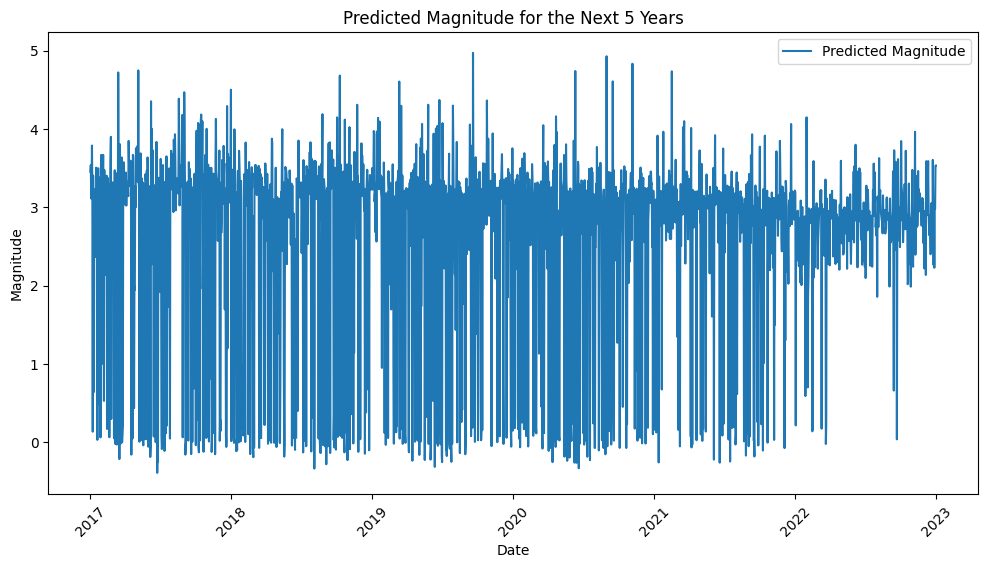

In [136]:
dates = future_data['Tanggal']  # Kolom Tanggal dari data gempa 5 tahun terakhir
plt.figure(figsize=(12, 6))
plt.plot(dates, y_pred, label='Predicted Magnitude')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Predicted Magnitude for the Next 5 Years')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.show()

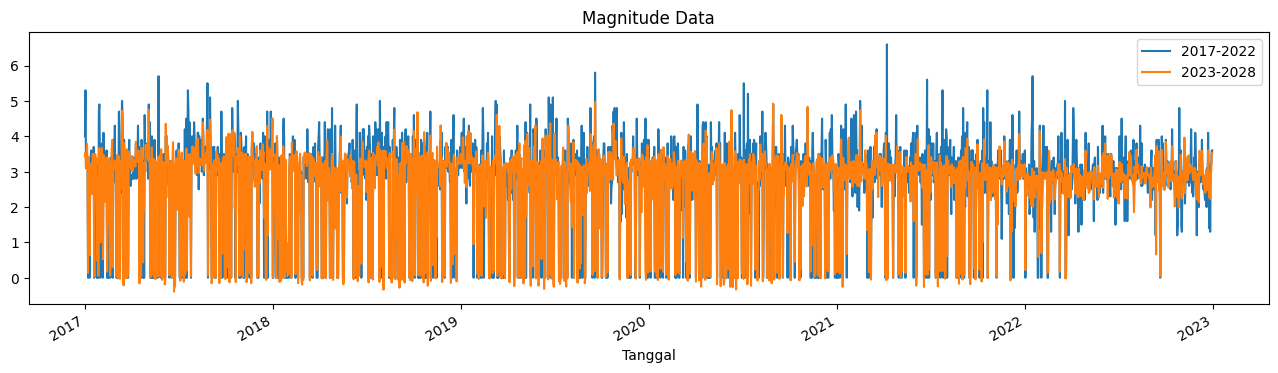

In [137]:
# Plotting magnitude data for 2017-2022 and predicted data for 2023-2028
plt.figure(figsize=(16, 4))
data.loc[:'2022', 'Magnitude'].plot(legend=True)
plt.plot(dates, y_pred, label='Predicted Data')
plt.legend(['2017-2022', '2023-2028'])
plt.title('Magnitude Data')
plt.show()


In [ ]:
# Melakukan penskalaan fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)